# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision
---
#### <a href="https://taldatech.github.io/">Tal Daniel</a> 

## Appendix Tutorial - Visualizing CNN Filters
---


### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Visualizing CNN Filters](#-Visualizing-CNN-Filters)
    * [Approach 1](#-Approach-1)
    * [Approach 2](#-Approach-2)
* [Visualizing Layer Output](#-Visualizing-Layer-Output)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# pytorch
import torch 
import torch.nn as nn
import torchvision

# import datasets in torchvision
import torchvision.datasets as datasets
# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils

## <img src="https://img.icons8.com/dusk/64/000000/doughnut-chart.png" style="height:50px;display:inline"> Visualizing CNN Filters
---
* In this appendix tutorial we are going to deonstrate how to visualize the filters in a trained CNN.
* We are going to present two approaches, choose the one you are most comfortable with, they are equivalent.

## <img src="https://img.icons8.com/dusk/64/000000/1-circle-c.png" style="height:50px;display:inline"> Approach 1
---
* Taken from this repo: https://github.com/Niranjankumar-c/DeepLearning-PadhAI/tree/master/DeepLearning_Materials/6_VisualizationCNN_Pytorch

In [2]:
# functions to visualize the kernels

def plot_filters_single_channel_big(t):
    
    #setting the rows and columns
    nrows = t.shape[0] * t.shape[2]
    ncols = t.shape[1] * t.shape[3]
    
    
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))
#     fig, ax = plt.subplots(nrows=nrows, ncols=ncols)  
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)
    
    
def plot_filters_single_channel(t):
    
    # kernels depth * number of kernels
    nplots = t.shape[0] * t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots // ncols
    # convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    # looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    
    
def plot_filters_multi_channel(t):
    
    # get the number of kernals
    num_kernels = t.shape[0]    
    
    # define number of columns for subplots
    num_cols = 12
    # rows = num of kernels
    num_rows = num_kernels
    
    # set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    # looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        # for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        # standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
#     plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    
    
def plot_weights(model, layer_num, single_channel=True, collated=False):
    # extracting the model features at the particular layer number
    layer = model.features[layer_num]
  
    # checking whether the layer is convolution layer or not 
    if isinstance(layer, nn.Conv2d):
        # getting the weight tensor data
        weight_tensor = model.features[layer_num].weight.data

        if single_channel:
            if collated:
                plot_filters_single_channel_big(weight_tensor)
            else:
                plot_filters_single_channel(weight_tensor)
        else:
            if weight_tensor.shape[1] == 3:
                plot_filters_multi_channel(weight_tensor)
            else:
                print("Can only plot weights with three channels with single channel = False")
    else:
        print("Can only visualize layers which are convolutional")

In [3]:
# for visualization we will use vgg16 pretrained on imagenet data
# load pretrained model
model = models.vgg16(pretrained=True)
# put in evaluation mode
model.eval();

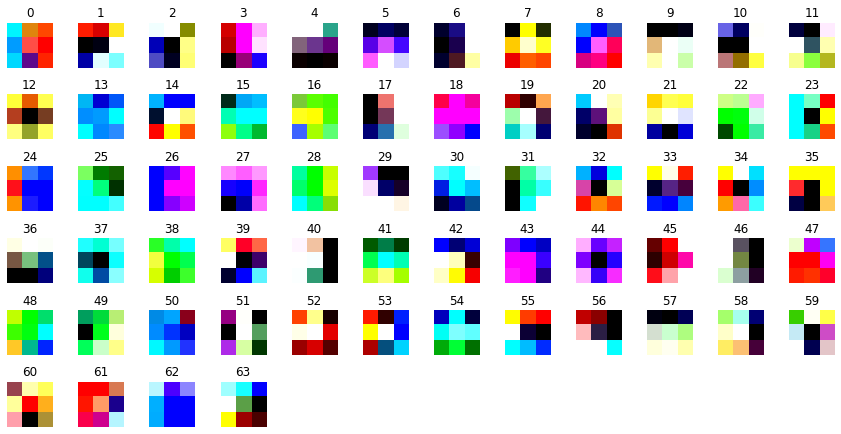

In [4]:
# visualize weights for vgg16 - first conv layer
plot_weights(model, 0, single_channel=False)

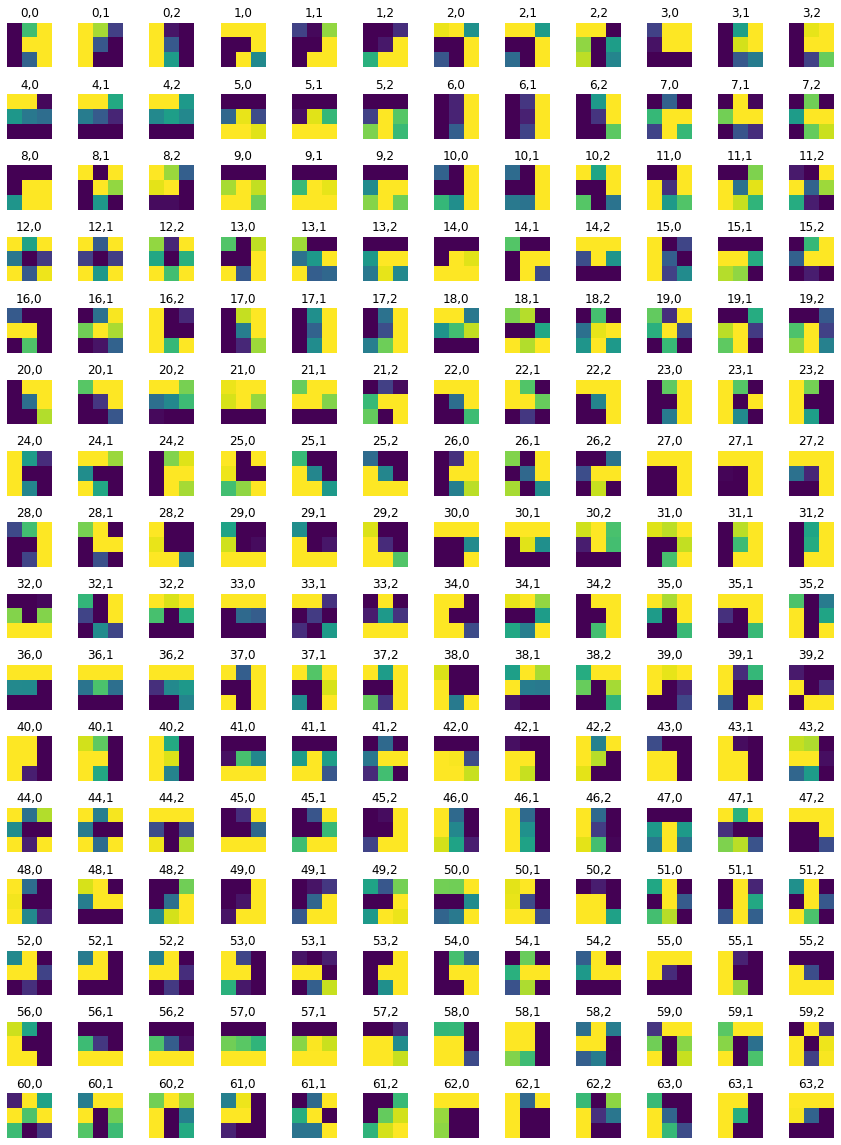

In [5]:
# plotting single channel images
plot_weights(model, 0, single_channel=True)

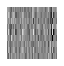

In [6]:
plot_weights(model, 0, single_channel=True, collated=True)

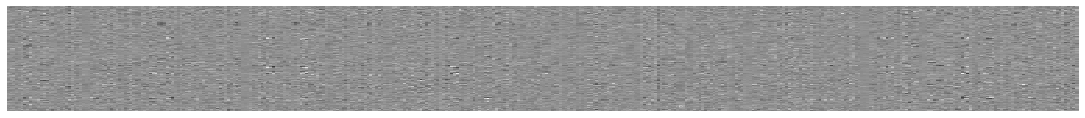

In [7]:
plot_weights(model, 5, single_channel=True, collated=True)

## <img src="https://img.icons8.com/plasticine/100/000000/2.png" style="height:50px;display:inline"> Approach 2
---
* Taken from this repo: https://github.com/pedrodiamel/nettutorial/blob/master/pytorch/pytorch_visualization.ipynb

In [9]:
# functions to visualize the kernels
def vistensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    '''
    vistensor: visuzlization tensor
        @ch: visualization channel 
        @allkernels: visualization all tensores
    ''' 
    
    n, c, w, h = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h )
    elif c != 3: tensor = tensor[:, ch, :, :].unsqueeze(dim=1)
        
    rows = np.min((tensor.shape[0] // nrow + 1, 64 ))    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure(figsize=(nrow,rows))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

def savetensor(tensor, filename, ch=0, allkernels=False, nrow=8, padding=2):
    '''
    savetensor: save tensor
        @filename: file name
        @ch: visualization channel 
        @allkernels: visualization all tensores
    '''    

    n, c, w, h = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h )
    elif c != 3: tensor = tensor[:, ch, :, :].unsqueeze(dim=1)    
    utils.save_image(tensor, filename, nrow=nrow )

torch.Size([128, 64, 3, 3])


(-0.5, 32.5, 64.5, -0.5)

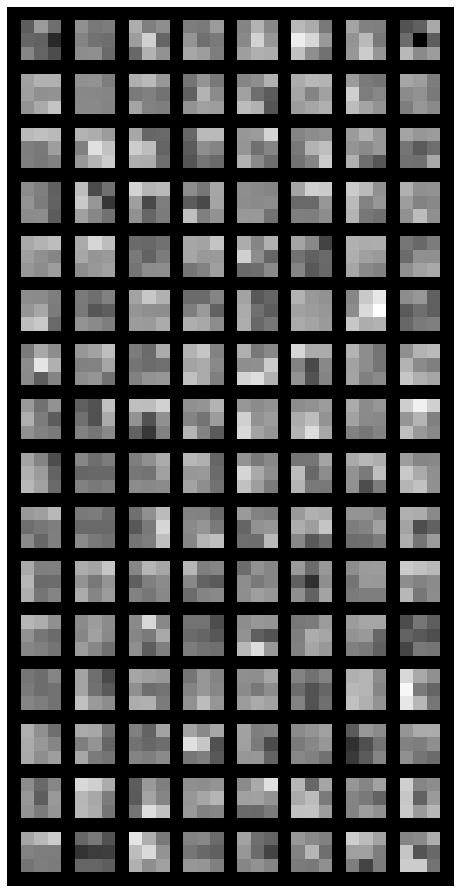

In [12]:
ik = 5
kernel = model.features[ik].weight.data.clone()
print(kernel.shape)

vistensor(kernel, ch=0, allkernels=False)
# savetensor(kernel, 'kernel.png', allkernels=False)

plt.axis('off')

## <img src="https://img.icons8.com/color/96/000000/xray.png" style="height:50px;display:inline"> Visualizing Layer Output
---
* We can see which neurons are active for every input image.
* This way we can a better understanding of what the network sees during forward pass, whcih probably affects the final prediction.
* Taken from this repo: https://github.com/sar-gupta/convisualize_nb/blob/master/cnn-visualize.ipynb

In [10]:
# helper functions
def to_grayscale(image):
    """
    input is (d,w,h)
    converts 3D image tensor to grayscale images corresponding to each channel
    """
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

def normalize(image, device=torch.device("cpu")):
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
    ])
    image = preprocess(image).unsqueeze(0).to(device)
    return image


def predict(image, model, labels=None):
    _, index = model(image).data[0].max(0)
    if labels is not None:
        return str(index.item()), labels[str(index.item())][1]
    else:
        return str(index.item()) 
    
def deprocess(image, device=torch.device("cpu")):
    return image * torch.tensor([0.229, 0.224, 0.225]).to(device) + torch.tensor([0.485, 0.456, 0.406]).to(device)

def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image loaded successfully")
    return image

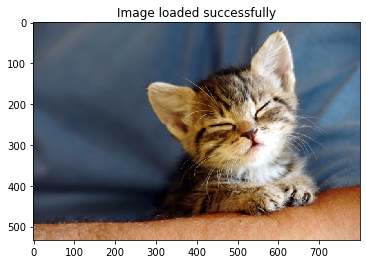

In [3]:
# load sample image
kitten_img = load_image("./assets/sample_images/kitten.jpg")

In [4]:
# load pre-trained model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=True).to(device)
# put in evaluation mode
model.eval();

In [12]:
# pre-process image and predict label
prep_img = normalize(kitten_img, device)
print("predicted class:", predict(prep_img, model))

predicted class: 281


#### Output of Each Layer

In [17]:
def layer_outputs(image, model):
    modulelist = list(model.features.modules())
    outputs = []
    names = []
    for layer in modulelist[1:]:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
        
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())
        
    fig = plt.figure(figsize=(30, 50))

    for i in range(len(output_im)):
        a = fig.add_subplot(8, 4, i+1)
        imgplot = plt.imshow(output_im[i])
        a.set_axis_off()
        a.set_title(names[i].partition('(')[0], fontsize=30)
    plt.tight_layout()
#     plt.savefig('layer_outputs.jpg', bbox_inches='tight')

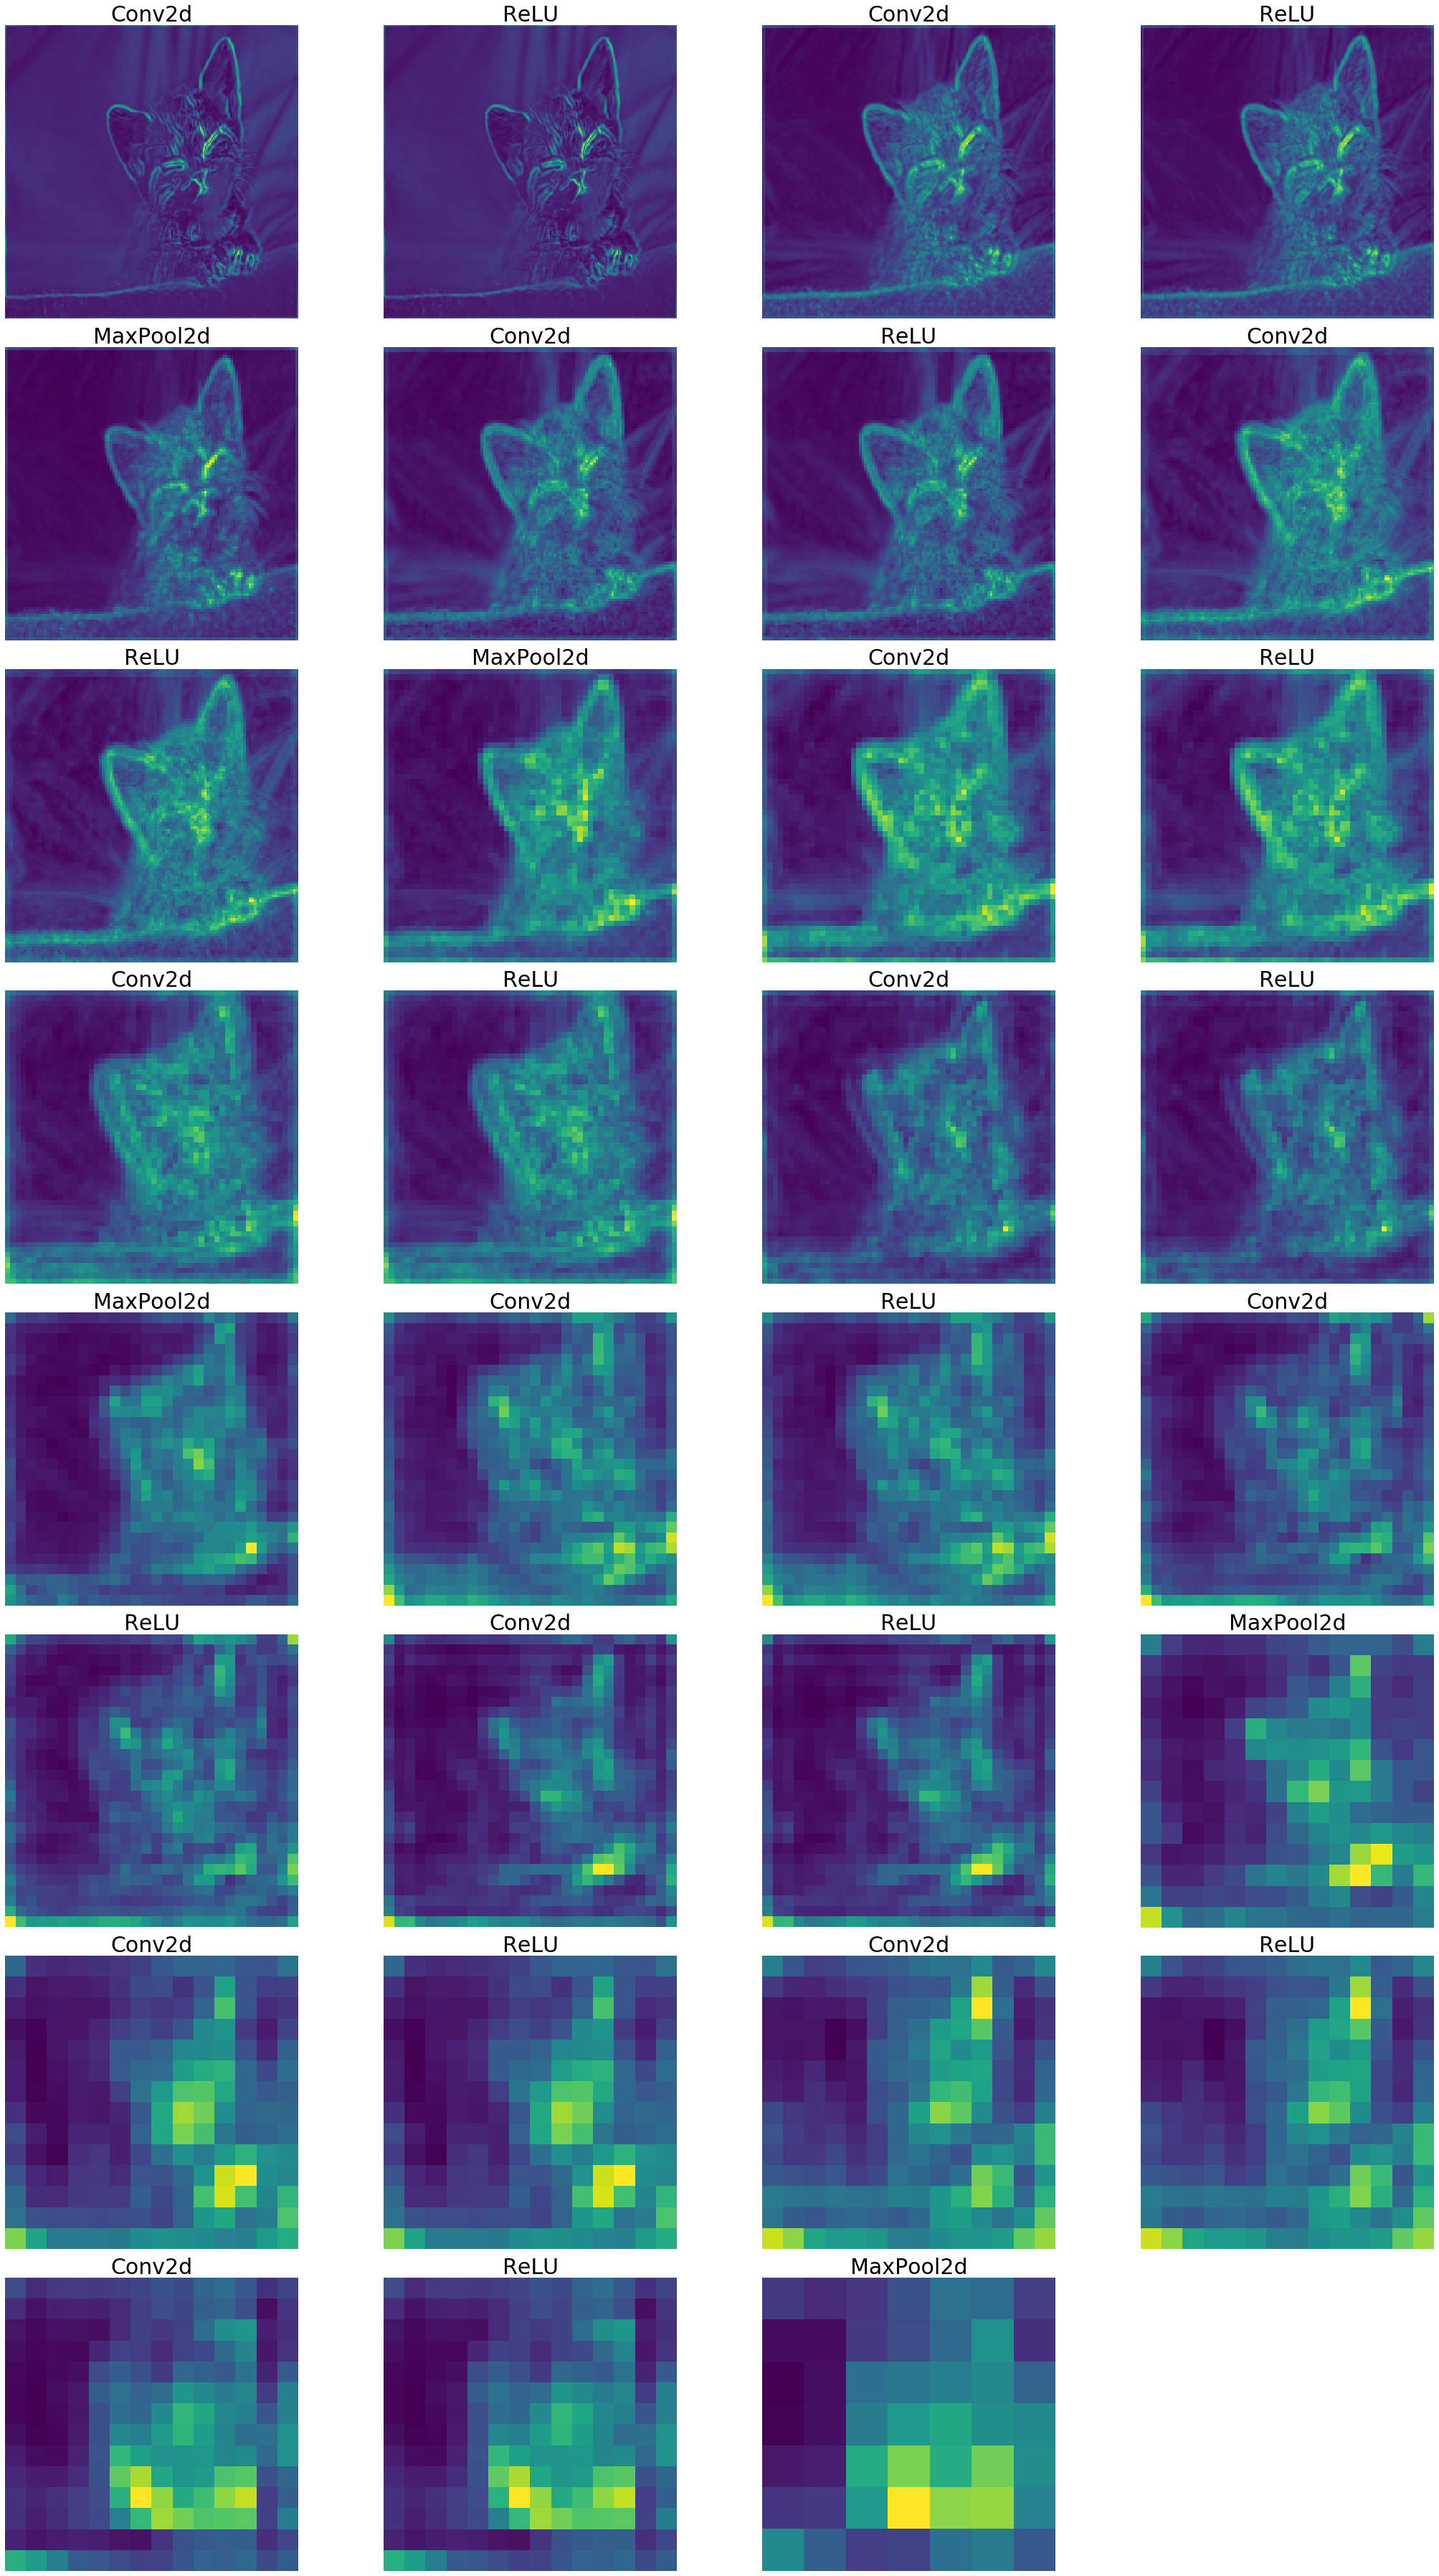

In [18]:
layer_outputs(prep_img, model)

#### Output of Each Filter for a Certain Layer

In [22]:
def filter_outputs(image, model, layer_to_visualize):
    modulelist = list(model.features.modules())
    if layer_to_visualize < 0:
        layer_to_visualize += 31
    output = None
    name = None
    for count, layer in enumerate(modulelist[1:]):
        image = layer(image)
        if count == layer_to_visualize: 
            output = image
            name = str(layer)
    
    filters = []
    output = output.data.squeeze().cpu().numpy()
    for i in range(output.shape[0]):
        filters.append(output[i,:,:])
        
    fig = plt.figure(figsize=(10, 10))

    for i in range(int(np.sqrt(len(filters))) * int(np.sqrt(len(filters)))):
        ax = fig.add_subplot(np.sqrt(len(filters)), np.sqrt(len(filters)), i+1)
        imgplot = ax.imshow(filters[i])
        ax.set_axis_off()
    plt.tight_layout()

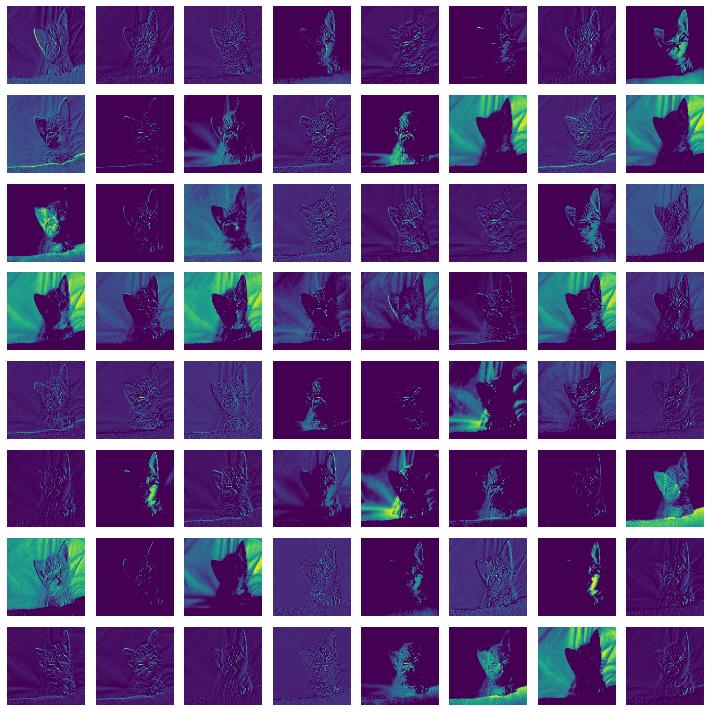

In [23]:
filter_outputs(prep_img, model, 0)

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* EE 046746 Spring 21 - <a href="https://taldatech.github.io/">Tal Daniel</a> 
* <a href="https://github.com/Niranjankumar-c/DeepLearning-PadhAI/tree/master/DeepLearning_Materials/6_VisualizationCNN_Pytorch">GitHub Repository 1</a>
* <a href="https://github.com/pedrodiamel/nettutorial/blob/master/pytorch/pytorch_visualization.ipynb">GitHub Repository 2</a>
* <a href="https://github.com/sar-gupta/convisualize_nb/blob/master/cnn-visualize.ipynb">GitHub Repository 3</a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com